In [1]:
%cd ..
%pip install -e .

/home/sandor/dtu/2021-22-spring/advanced_machine_learning/p-reg
Obtaining file:///home/sandor/dtu/2021-22-spring/advanced_machine_learning/p-reg
  Preparing metadata (setup.py) ... done
  Attempting uninstall: src
    Found existing installation: src 0.1.0
    Uninstalling src-0.1.0:
      Successfully uninstalled src-0.1.0
  Running setup.py develop for src
Note: you may need to restart the kernel to use updated packages.


In [2]:
from src.models.dense import NN0
from src.models.dense import NN1
from src.models.gcn import GCN0

from src.models.train_model import train0
from src.models.train_model import set_masks
from src.models.evaluate_model import evaluate0

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.datasets import Planetoid

from sklearn.manifold import TSNE

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataset = Planetoid(root='data/Planetoid', name='Cora')
data = dataset[0].to(device)

In [4]:
# defining dense model
dense_model = NN1(num_node_features=dataset.num_node_features, 
                  num_classes=dataset.num_classes) \
                 .to(device)

# training dense model
dense_model = train0(dense_model, data)

# evaluating the model
acc = evaluate0(dense_model, data)
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.5560


In [5]:
# defining vanilla gcn model
gcn_model = GCN0(num_node_features=dataset.num_node_features,
                 num_classes=dataset.num_classes) \
                .to(device)


/home/sandor/.virtualenv/p-reg-env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


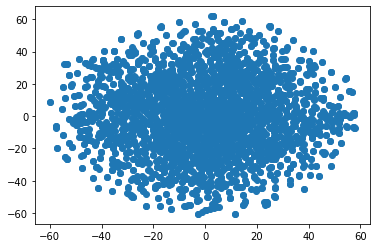

In [6]:
# visualizing embdeddings

embeddings = gcn_model.conv1(data.x, data.edge_index)

tsne = TSNE(learning_rate=20, random_state=42)
tsne_features = tsne.fit_transform(list(embeddings.detach().numpy()))

plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [7]:
# training the model
gcn_model = train0(gcn_model, data)

# evaluating the model
acc = evaluate0(gcn_model, data)
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.8080


/home/sandor/.virtualenv/p-reg-env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


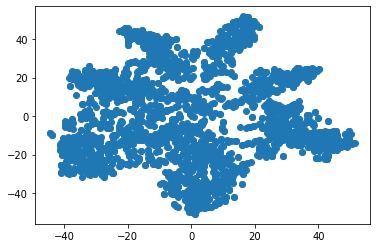

In [8]:
# visualizing embdeddings
embeddings = gcn_model.conv1(data.x, data.edge_index)

tsne = TSNE(learning_rate=20, random_state=42)
tsne_features = tsne.fit_transform(list(embeddings.detach().numpy()))

plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

----

Altering train_mask

In [9]:
for split in [(100, 1900, 708), (200, 1800, 708), (500, 1500, 708), (1000, 1000, 708), (1500, 500, 708)]:
    data = set_masks(data, split)

    gcn_model = GCN0(num_node_features=dataset.num_node_features,
                    num_classes=dataset.num_classes) \
                    .to(device)

    gcn_model = train0(gcn_model, data)    
    # evaluating the model
    acc = evaluate0(gcn_model, data)
    print(f'Accuracy: {acc:.4f}')

Accuracy: 0.7542
Accuracy: 0.8277
Accuracy: 0.8362
Accuracy: 0.8432
Accuracy: 0.8559
